Python API HW.
The temperature definatly gets hotter on average as you approach the equator. There are two low points in humidity between twenty and fourty for positive and negative lat. Wind gets stronger the further south y9u go past the equator. 

In [30]:
import random
from citipy import citipy
import pandas as pd
import requests as req
import json
import matplotlib.pyplot as plt

In [31]:
api_key = "afbde06f4217fea7175e8c03acbc3eac"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [32]:
count = 0
lats = []
lngs = []

while count < 1200:
    lats.append(random.uniform(-90,90))
    lngs.append(random.uniform(-180,180))
    count = count+1

In [33]:
cities = ['london']
countries =['GB']
for lat, lng in zip(lats, lngs):
    cityid = citipy.nearest_city(lat, lng)
    city = cityid.city_name
    country = cityid.country_code
    cities.append(city)
    countries.append(country)

In [35]:
temp_data       = []
lon_data        = [] 
temp_data       = []
lat_data        = []
humidity_data   = []
cloud_data      = []
wind_data       = []

for city in cities:
    weather_json = req.get(query_url + city).json()
    try:
        temp_data.append(weather_json['main']['temp'])
        lon_data.append(weather_json['coord']['lon'])
        lat_data.append(weather_json['coord']['lat'])
        humidity_data.append(weather_json['main']['humidity'])
        cloud_data.append(weather_json['clouds']['all'])
        wind_data.append(weather_json['wind']['speed'])
    except:
        print('no city found')


no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no city found
no cit

In [36]:
weather_data = {"lon": lon_data, 'temp':temp_data, 'lat':lat_data,'humidity':humidity_data, 'cloud':cloud_data, 'wind': wind_data}
weather_data = pd.DataFrame(weather_data)
weather_data.head() 

,cloud,humidity,lat,lon,temp,wind
0,90,87,51.51,-0.13,46.74,13.87
1,80,100,72.79,-56.15,10.92,7.90
2,75,88,-7.84,-79.15,66.20,9.17
3,8,31,-46.19,168.86,70.01,18.63
4,75,83,-21.21,-159.78,73.40,3.36


In [37]:
weather_df = weather_data.drop_duplicates(keep='first')
weather_df.head()

,cloud,humidity,lat,lon,temp,wind
0,90,87,51.51,-0.13,46.74,13.87
1,80,100,72.79,-56.15,10.92,7.90
2,75,88,-7.84,-79.15,66.20,9.17
3,8,31,-46.19,168.86,70.01,18.63
4,75,83,-21.21,-159.78,73.40,3.36


In [38]:
len(weather_df)

504

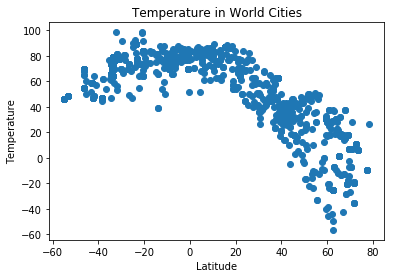

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.show()

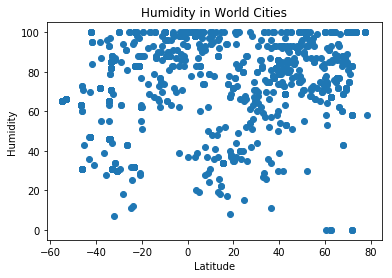

In [40]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

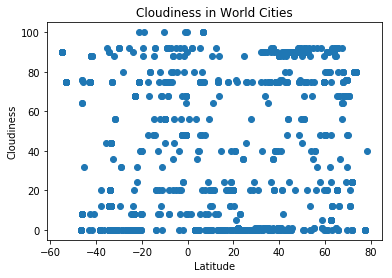

In [44]:
plt.scatter(weather_data["lat"], weather_data["cloud"], marker="o")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

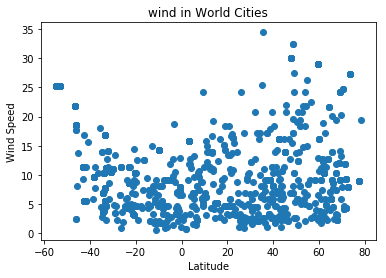

In [43]:
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")
plt.title("wind in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()